# 6.6 Sourcing & Analyzing Time-Series Data

## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Creating path
path = r'C:\Users\ZenBook\Heart Attack Risk Prediction Dataset'

# Importing dataset 'cardiovascular disease death rate who mdb'
df = pd.read_csv(os.path.join(path,'02 Data Profile', 'cardiovascular-disease-death-rate-who-mdb.csv'))

Dataset 'Death rate from cardiovascular diseases, 1950-2023' based on the WHO Mortality Database (2025) reported annual death rate from cardiovascular diseases per 100,000 people, based on the underlying cause listed on death certificates. It was sourced from the Our World, last update in April 17, 2025 (https://archive.ourworldindata.org/20250909-093708/grapher/cardiovascular-disease-death-rate-who-mdb.html?time=earliest..2023#sources-and-processing).

In [3]:
df.head(5)

,Entity,Year,"Age-standardized deaths from cardiovascular diseases in both sexes in those aged all ages per 100,000 people"
0,Australia,1950,493.10950
1,Australia,1951,512.75950
2,Australia,1952,516.45050
3,Australia,1953,497.55930
4,Australia,1954,501.36963


In [4]:
df

,Entity,Year,"Age-standardized deaths from cardiovascular diseases in both sexes in those aged all ages per 100,000 people"
0,Australia,1950,493.10950
1,Australia,1951,512.75950
2,Australia,1952,516.45050
3,Australia,1953,497.55930
4,Australia,1954,501.36963
...,...,...,...
544,United States,2018,130.09830
545,United States,2019,126.21044
546,United States,2020,132.97804
547,United States,2021,134.24542


In [5]:
df.shape

(549, 3)

In [6]:
df.columns

Index(['Entity', 'Year',
       'Age-standardized deaths from cardiovascular diseases in both sexes in those aged all ages per 100,000 people'],
      dtype='object')

In [7]:
type(df)

pandas.core.frame.DataFrame

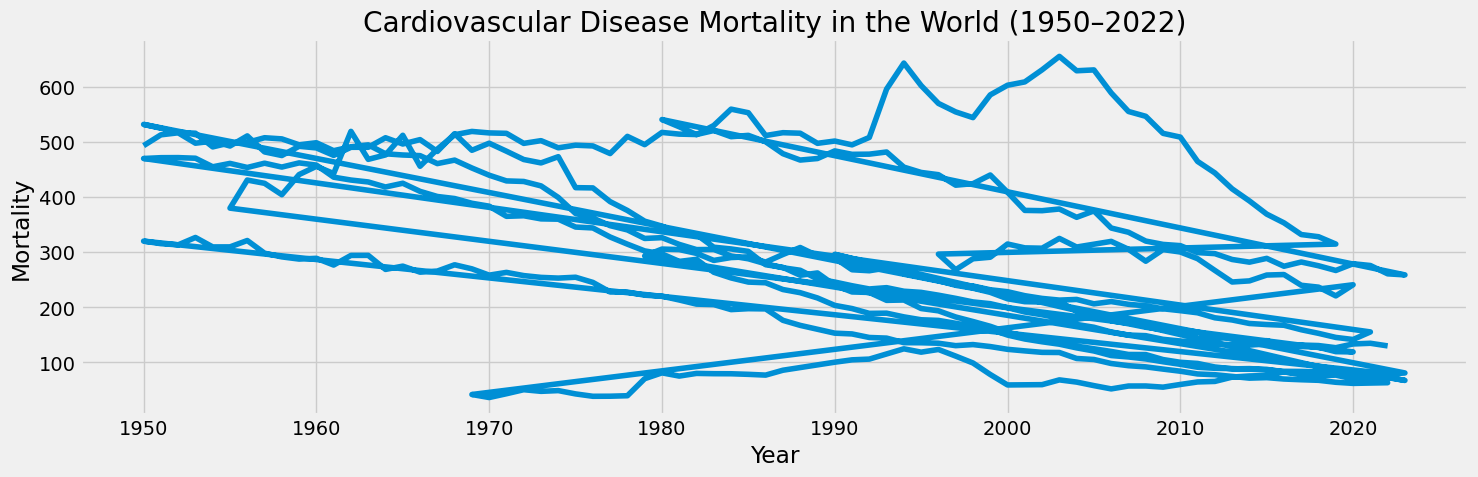

In [8]:
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(df['Year'], df['Age-standardized deaths from cardiovascular diseases in both sexes in those aged all ages per 100,000 people'])

plt.xlabel('Year')
plt.ylabel('Mortality')
plt.title('Cardiovascular Disease Mortality in the World (1950–2022)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Subsetting, wrangling, and cleaning time-series data

In [9]:
# Rename the long column 'Age-standardized deaths from cardiovascular diseases in both sexes in those aged all ages per 100,000 people' to 'Mortality'
df = df.rename(columns={
    'Age-standardized deaths from cardiovascular diseases in both sexes in those aged all ages per 100,000 people': 'Mortality'
})

In [10]:
df

,Entity,Year,Mortality
0,Australia,1950,493.10950
1,Australia,1951,512.75950
2,Australia,1952,516.45050
3,Australia,1953,497.55930
4,Australia,1954,501.36963
...,...,...,...
544,United States,2018,130.09830
545,United States,2019,126.21044
546,United States,2020,132.97804
547,United States,2021,134.24542


In [17]:
# Create subset 'df_new' including columns Years and Mortality only
df_new = df.drop(columns=['Entity'])

In [18]:
df_new

,Year,Mortality
0,1950,493.10950
1,1951,512.75950
2,1952,516.45050
3,1953,497.55930
4,1954,501.36963
...,...,...
544,2018,130.09830
545,2019,126.21044
546,2020,132.97804
547,2021,134.24542


In [29]:
# Reset index so that you can use the "Year" column as a filter

data = df_new.reset_index(drop=True)

In [30]:
data

,Year,Mortality
0,1950,493.10950
1,1951,512.75950
2,1952,516.45050
3,1953,497.55930
4,1954,501.36963
...,...,...
544,2018,130.09830
545,2019,126.21044
546,2020,132.97804
547,2021,134.24542


In [31]:
# subsutting for 1990-2020 years only
data_sub = data.loc[(data['Year'] >= 1990) & (data['Year'] <= 2020)]

I decided to subset data from 1990-2020 range, because they were not to late, representable and mortality could be resoned by factors that we currently have. 

In [32]:
data_sub.shape

(299, 2)

In [33]:
data_sub.head()

,Year,Mortality
40,1990,239.63553
41,1991,227.42978
42,1992,226.56128
43,1993,212.17006
44,1994,212.78877


In [35]:
data_sub

,Year,Mortality
40,1990,239.63553
41,1991,227.42978
42,1992,226.56128
43,1993,212.17006
44,1994,212.78877
...,...,...
542,2016,131.07285
543,2017,131.03789
544,2018,130.09830
545,2019,126.21044


In [36]:
data_sub = data_sub.set_index('Year')

Set the "Year" column as the index

In [37]:
data_sub

,Mortality
Year,
1990,239.63553
1991,227.42978
1992,226.56128
1993,212.17006
1994,212.78877
...,...
2016,131.07285
2017,131.03789
2018,130.09830


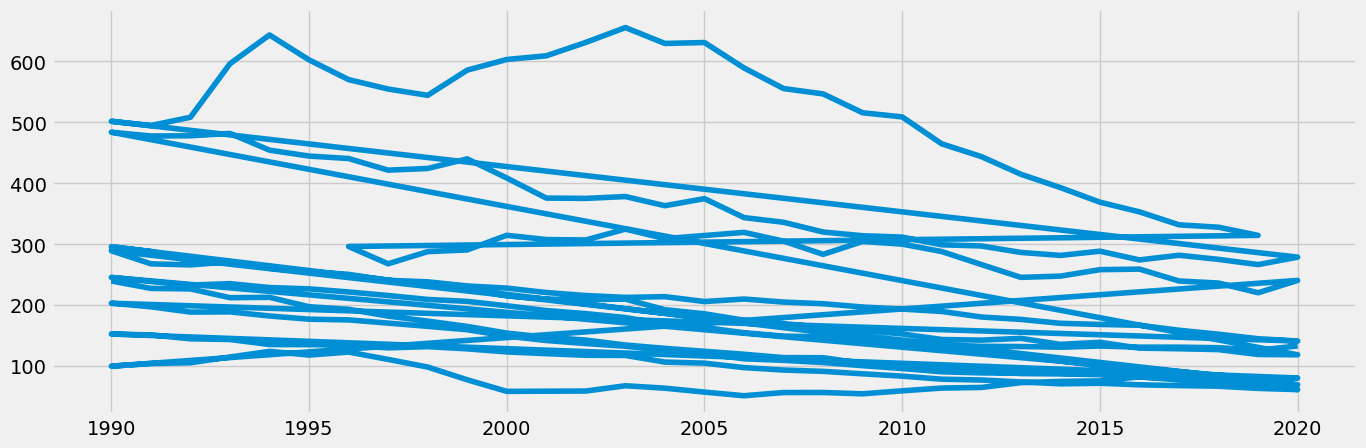

In [38]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [39]:
# Check for missing values

data_sub.isnull().sum() 

Mortality    0
dtype: int64

There is no duplicates

## 3. Time-series analysis: decomposition

In [41]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive', period=1)

In [42]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

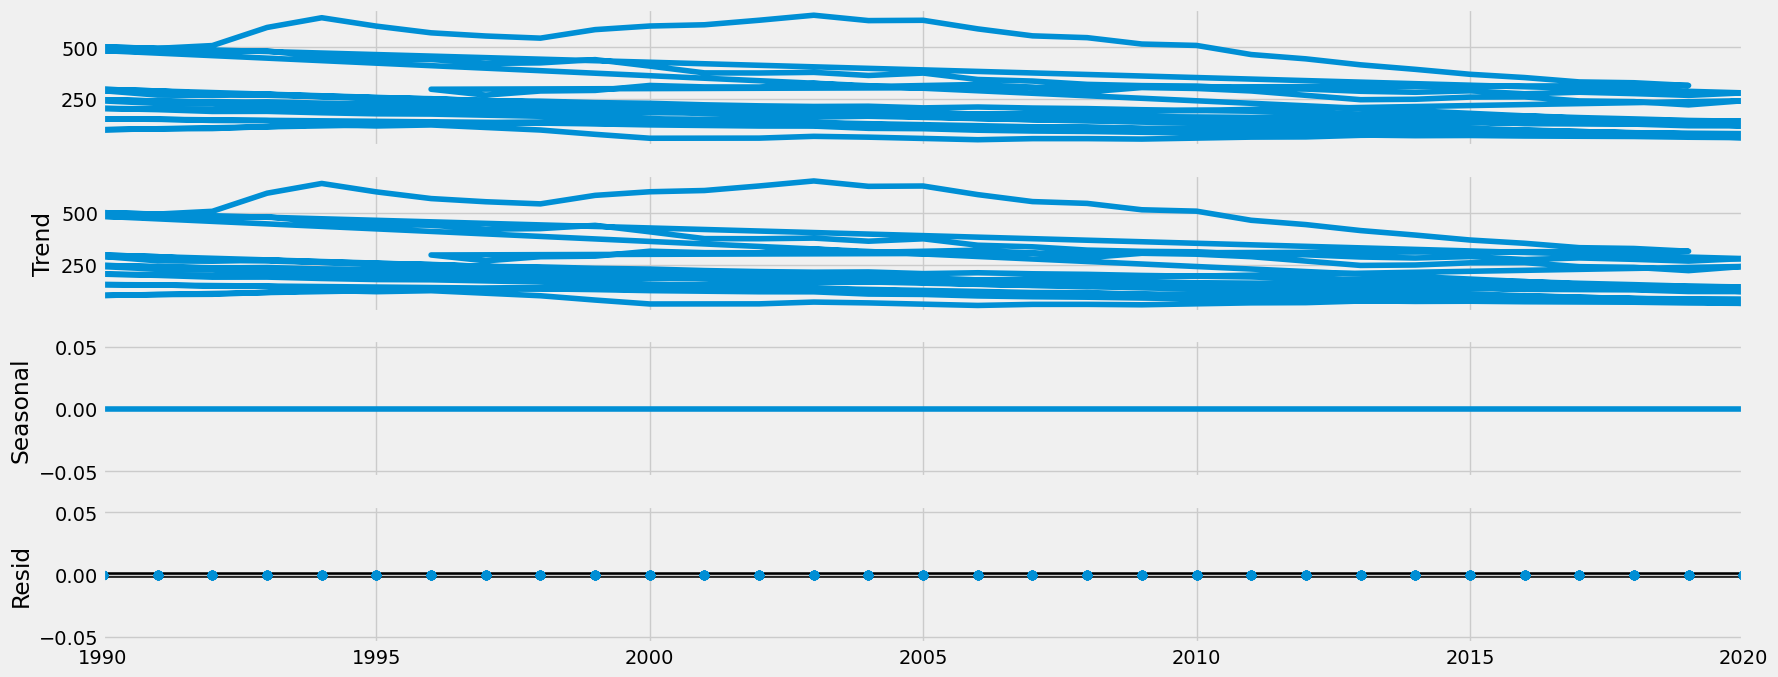

In [43]:
# Plot the separate components

decomposition.plot()
plt.show()

**Interpretation**:
- Trend: The mortality rate shows a clear downward trend from the early 1990s to 2020, indicating long-term improvements in cardiovascular health or healthcare access.
- Seasonal: The seasonal line remains flat at 0, suggesting no recurring seasonal pattern in the data, which is expected for yearly record.
- Residuals: The residuals are minimal and centered around zero, meaning the model fits the data well and there's little unexplained variation.
- The Decomposition confirms that most variation is captured by the trend, with negligible seasonal or random noise.

## 4. Testing for stationarity

In [45]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Mortality'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.218186
p-value                          0.199711
Number of Lags Used              0.000000
Number of Observations Used    298.000000
Critical Value (1%)             -3.452486
Critical Value (5%)             -2.871288
Critical Value (10%)            -2.571964
dtype: float64


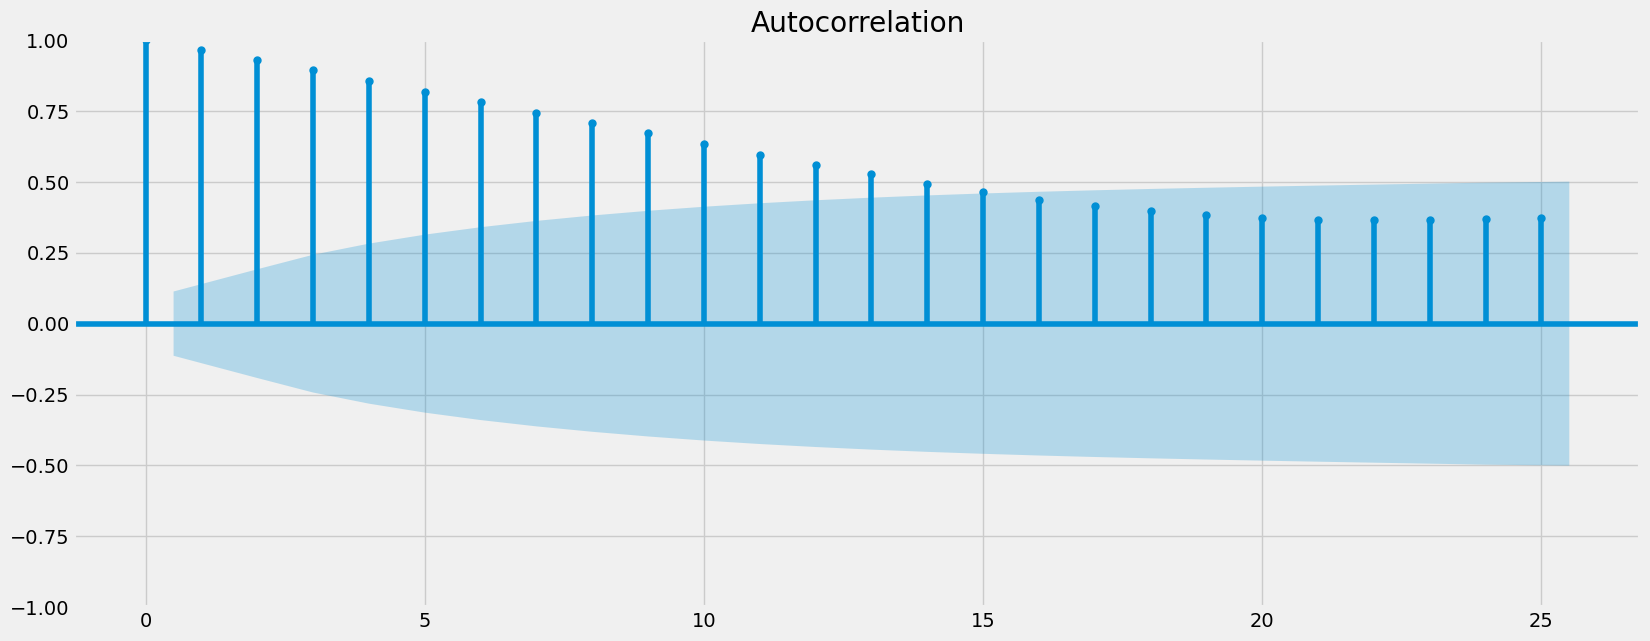

In [46]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # importing the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

**Interpretation**:
- Null Hypothesis: The time series has a unit root, meaning it is non-stationary (i.e., its statistical properties like mean and variance change over time).
- Test Statistic = -2.218: This value is higher (less negative) than all critical values at 1%, 5%, and 10% significance levels.
- p-value = 0.1997: Since this is greater than 0.05, it is fail to reject the null hypothesis — the series likely is not stationary.
- Time series shows signs of non-stationarity. It is probably better to apply transformations like differencing or log scaling before modeling.

## 5. Stationarizing the Data

## Differencing

In [47]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [48]:
data_diff.dropna(inplace = True) # removing the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [49]:
data_diff.head()

,Mortality
Year,
1991,-12.20575
1992,-0.86850
1993,-14.39122
1994,0.61871
1995,-15.44011


In [50]:
data_diff.columns

Index(['Mortality'], dtype='object')

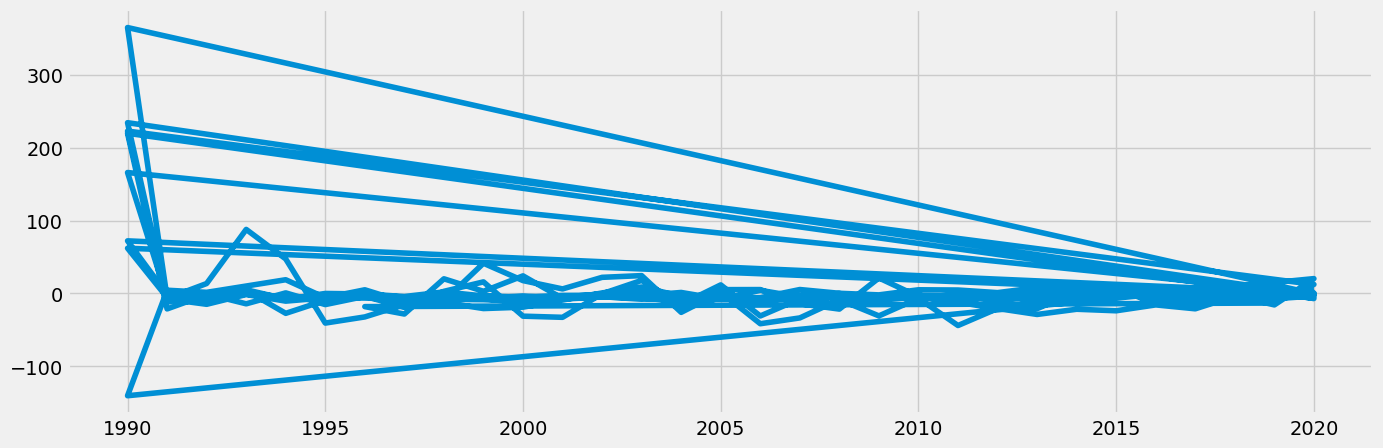

In [51]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [52]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.708814e+01
p-value                        7.623855e-30
Number of Lags Used            0.000000e+00
Number of Observations Used    2.970000e+02
Critical Value (1%)           -3.452561e+00
Critical Value (5%)           -2.871321e+00
Critical Value (10%)          -2.571982e+00
dtype: float64


**Interpretation:**
- Test Statistic = -17.088: This is much lower than all critical values at 1%, 5%, and 10%, indicating strong evidence against the null hypothesis.
-  p-value = 7.62 × 10⁻³⁰: This is extremely small, far below any conventional significance level (e.g., 0.05), confirming the result is statistically significant.
-  It is possible to confidently reject the null hypothesis — the time series is stationary after transformation.

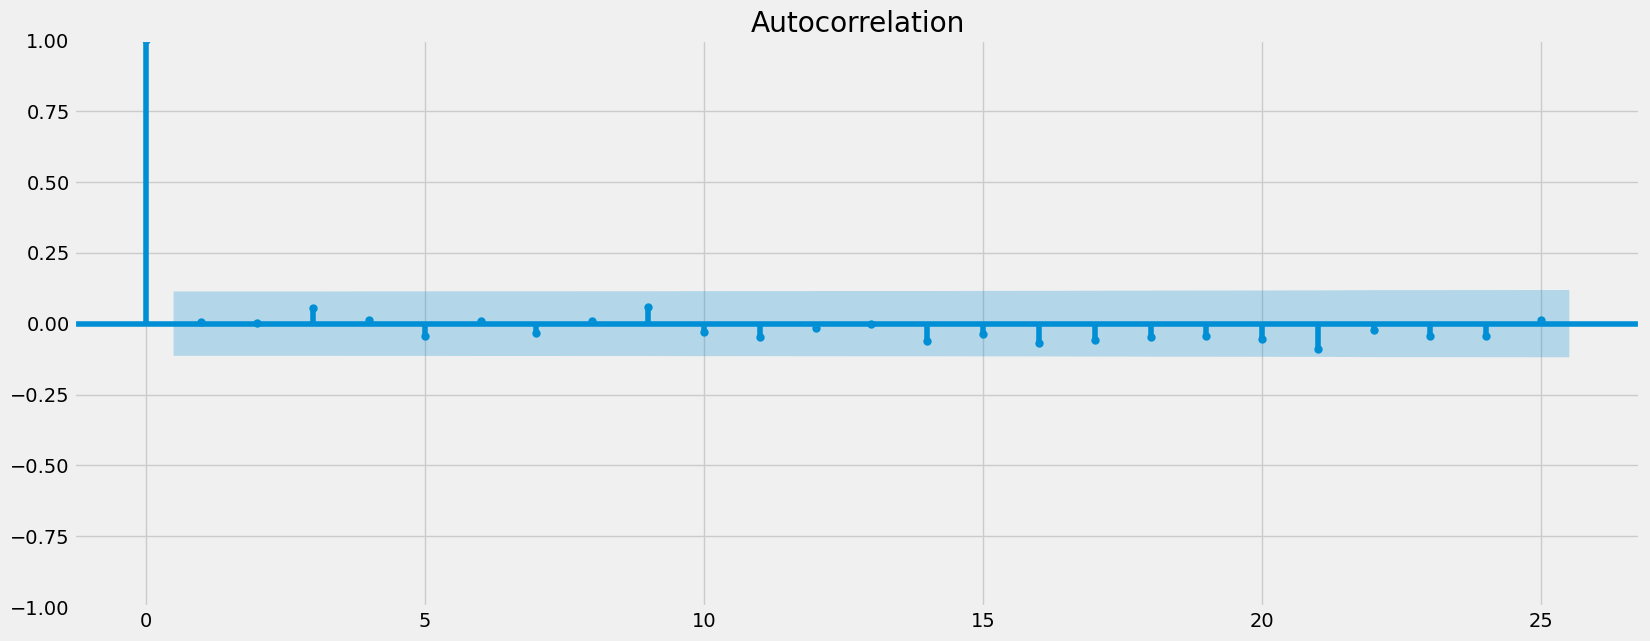

In [53]:
plot_acf(data_diff)
plt.show()

**Interpretation:**
-  Lag 0 Autocorrelation = 1.0: This is expected, as any time series is perfectly correlated with itself at lag 0.
-  Low Autocorrelation Beyond Lag 0: The bars at higher lags are close to zero and mostly within the confidence interval, suggesting no significant autocorrelation in the data.
- No Strong Temporal Dependence: This implies that past values of the series do not strongly predict future values, which is typical for stationary or noise-like data.
-  Combined with the Dickey-Fuller test, this plot reinforces the idea that the series may need transformation to reveal meaningful structure.